In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r"C:\Users\user\Desktop\Gi ds\hr_emp_churn.csv")

In [4]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [6]:
data.shape

(19158, 14)

In [7]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [8]:
data.isnull().sum()/data.shape[0]*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

In [9]:
data['gender'].value_counts()

gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64

In [10]:
data['gender'].fillna("unidentified",inplace=True)

In [11]:
data['gender'].value_counts()

gender
Male            13221
unidentified     4508
Female           1238
Other             191
Name: count, dtype: int64

In [12]:
data['enrolled_university'].value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [13]:
data['enrolled_university'].fillna(data['enrolled_university'].mode()[0],inplace=True)

In [14]:
data['enrolled_university'].value_counts()

enrolled_university
no_enrollment       14203
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [15]:
data['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [16]:
data['education_level'].fillna(data['education_level'].mode()[0],inplace=True)

In [17]:
data['education_level'].value_counts()

education_level
Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [18]:
data['major_discipline'].value_counts()

major_discipline
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64

In [19]:
data['major_discipline'].fillna(data['major_discipline'].mode()[0],inplace=True)

In [20]:
data['major_discipline'].value_counts()

major_discipline
STEM               17305
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64

In [21]:
data['experience'].value_counts()

experience
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: count, dtype: int64

In [22]:
data.dropna(subset=['experience'],inplace=True)

In [23]:
data.loc[data['experience'] == '>20', 'experience'] = '21'
data.loc[data['experience'] == '<1', 'experience'] = '0'
data['experience'] = data['experience'].astype(int)
data['experience'].unique()

array([21, 15,  5,  0, 11, 13,  7, 17,  2, 16,  1,  4, 10, 14, 18, 19, 12,
        3,  6,  9,  8, 20])

In [24]:
data['company_size'].value_counts()

company_size
50-99        3078
100-500      2563
10000+       2011
10/49        1466
1000-4999    1323
<10          1304
500-999       874
5000-9999     559
Name: count, dtype: int64

In [25]:
data['company_size'].fillna("unidentified",inplace=True)

In [26]:
data['company_type'].value_counts()

company_type
Pvt Ltd                9796
Funded Startup          999
Public Sector           953
Early Stage Startup     601
NGO                     519
Other                   121
Name: count, dtype: int64

In [27]:
data['company_type'].fillna("unidentified",inplace=True)

In [28]:
data['last_new_job'].value_counts()

last_new_job
1        8019
>4       3283
2        2897
never    2444
4        1028
3        1023
Name: count, dtype: int64

In [29]:
data['last_new_job'].fillna(data['last_new_job'].mode()[0],inplace=True)

In [30]:
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19093 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19093 non-null  int64  
 1   city                    19093 non-null  object 
 2   city_development_index  19093 non-null  float64
 3   gender                  19093 non-null  object 
 4   relevent_experience     19093 non-null  object 
 5   enrolled_university     19093 non-null  object 
 6   education_level         19093 non-null  object 
 7   major_discipline        19093 non-null  object 
 8   experience              19093 non-null  int32  
 9   company_size            19093 non-null  object 
 10  company_type            19093 non-null  object 
 11  last_new_job            19093 non-null  object 
 12  training_hours          19093 non-null  int64  
 13  target                  19093 non-null  float64
dtypes: float64(2), int32(1), int64(2), object(9

In [32]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,unidentified,unidentified,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,unidentified,No relevent experience,Full time course,Graduate,STEM,5,unidentified,unidentified,never,83,0.0
3,33241,city_115,0.789,unidentified,No relevent experience,no_enrollment,Graduate,Business Degree,0,unidentified,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0.0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19093 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19093 non-null  int64  
 1   city                    19093 non-null  object 
 2   city_development_index  19093 non-null  float64
 3   gender                  19093 non-null  object 
 4   relevent_experience     19093 non-null  object 
 5   enrolled_university     19093 non-null  object 
 6   education_level         19093 non-null  object 
 7   major_discipline        19093 non-null  object 
 8   experience              19093 non-null  int32  
 9   company_size            19093 non-null  object 
 10  company_type            19093 non-null  object 
 11  last_new_job            19093 non-null  object 
 12  training_hours          19093 non-null  int64  
 13  target                  19093 non-null  float64
dtypes: float64(2), int32(1), int64(2), object(9

In [34]:
def find_outliers_iqr(dataframe):
    outliers_count = {}
    
    for column in dataframe.select_dtypes(include=['number']).columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
        outliers_count[column] = len(outliers)
    
    return outliers_count

outliers_count = find_outliers_iqr(data)
print(outliers_count)


{'enrollee_id': 0, 'city_development_index': 17, 'experience': 0, 'training_hours': 978, 'target': 4754}


<Axes: ylabel='city_development_index'>

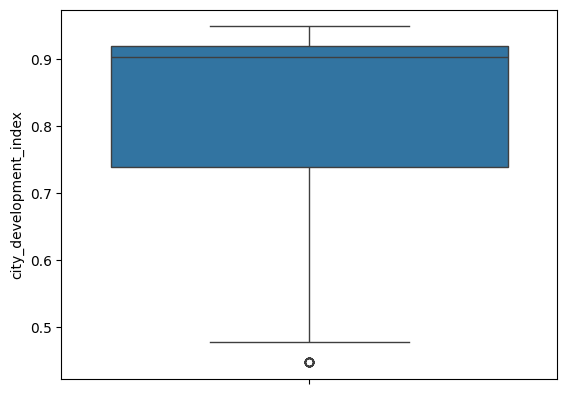

In [35]:
sns.boxplot(data['city_development_index'])

<Axes: ylabel='training_hours'>

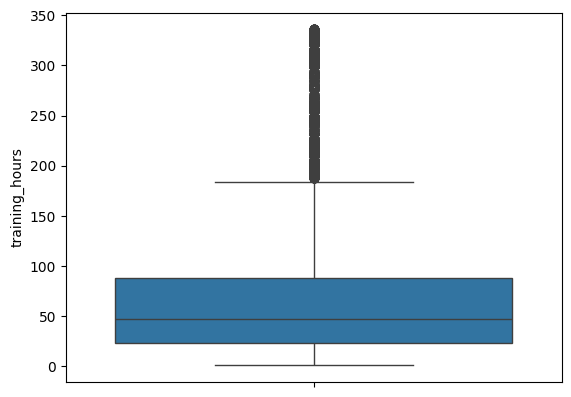

In [36]:
sns.boxplot(data['training_hours'])

In [37]:
data['target'].value_counts()

target
0.0    14339
1.0     4754
Name: count, dtype: int64

In [38]:
data['target'].value_counts(normalize=True)*100

target
0.0    75.100822
1.0    24.899178
Name: proportion, dtype: float64

In [39]:
data.drop(columns=['enrollee_id'],inplace=True)

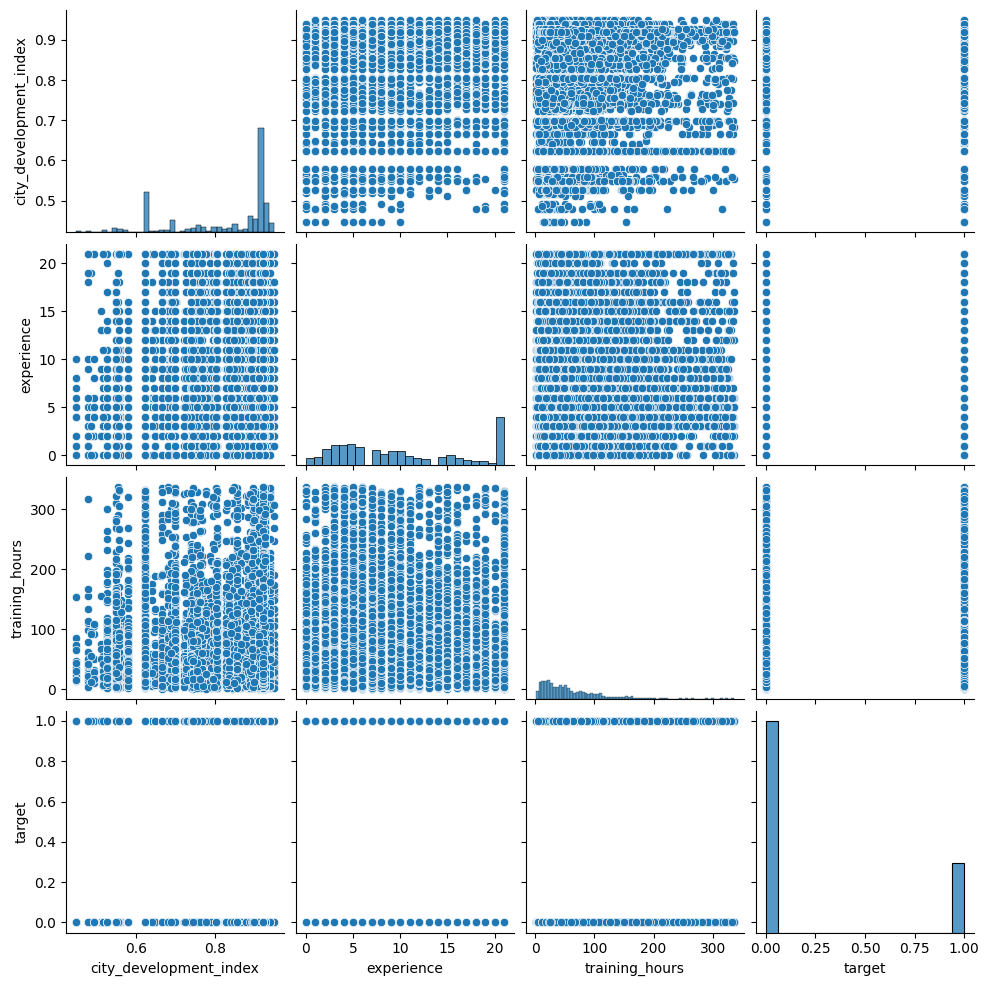

In [40]:
sns.pairplot(data)

In [41]:
data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,unidentified,unidentified,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,unidentified,No relevent experience,Full time course,Graduate,STEM,5,unidentified,unidentified,never,83,0.0
3,city_115,0.789,unidentified,No relevent experience,no_enrollment,Graduate,Business Degree,0,unidentified,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0.0


In [42]:
data['city'].value_counts()

city
city_103    4337
city_21     2685
city_16     1530
city_114    1334
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: count, Length: 123, dtype: int64

In [43]:
data.duplicated().sum()

52

In [44]:
data.drop_duplicates(inplace=True)

In [45]:
data.duplicated().sum()

0

In [46]:
data['city'].nunique()

123

In [47]:
data.drop('city',axis=1,inplace=True)

In [48]:
data.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,unidentified,unidentified,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,0.624,unidentified,No relevent experience,Full time course,Graduate,STEM,5,unidentified,unidentified,never,83,0.0
3,0.789,unidentified,No relevent experience,no_enrollment,Graduate,Business Degree,0,unidentified,Pvt Ltd,never,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0.0


<Axes: xlabel='gender', ylabel='count'>

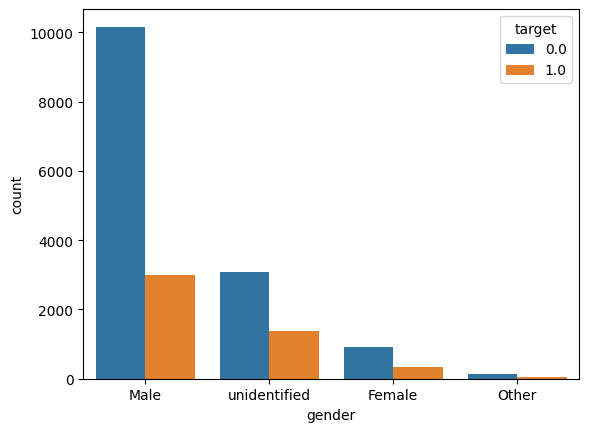

In [49]:
sns.countplot(x=data['gender'],hue=data['target'])

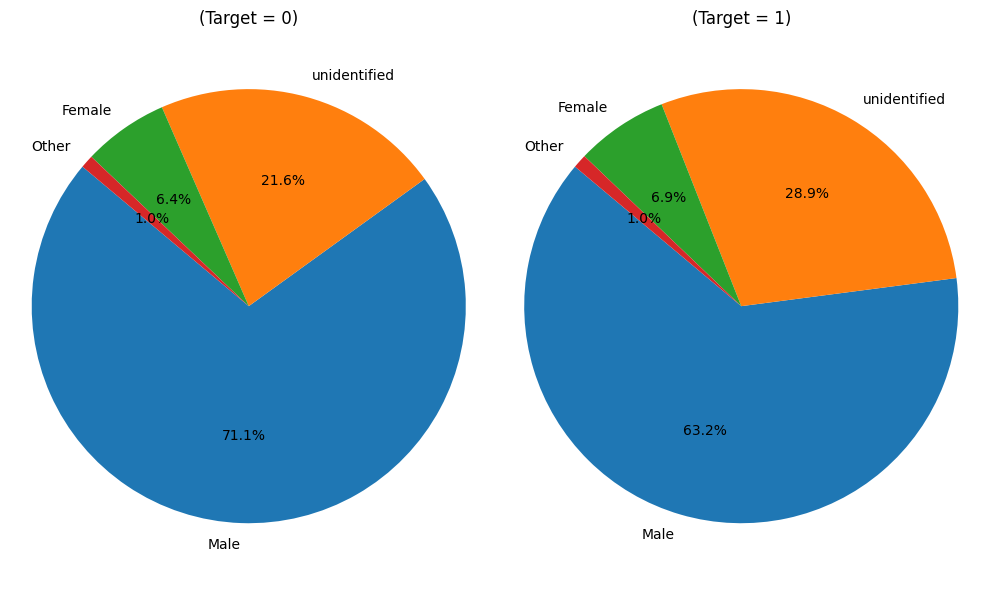

In [50]:
import matplotlib.pyplot as plt

# Filter the DataFrame for each target value
df_target_0 = data[data['target'] == 0]
df_target_1 = data[data['target'] == 1]

# Calculate counts for the 'relevant_experience' column in each subset
experience_counts_0 = df_target_0['gender'].value_counts()
experience_counts_1 = df_target_1['gender'].value_counts()

# Create pie chart for target 0
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.pie(experience_counts_0, labels=experience_counts_0.index, autopct='%1.1f%%', startangle=140)
plt.title('(Target = 0)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Create pie chart for target 1
plt.subplot(1, 2, 2)
plt.pie(experience_counts_1, labels=experience_counts_1.index, autopct='%1.1f%%', startangle=140)
plt.title('(Target = 1)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Show both pie charts
plt.tight_layout()
plt.show()


<Axes: xlabel='relevent_experience', ylabel='count'>

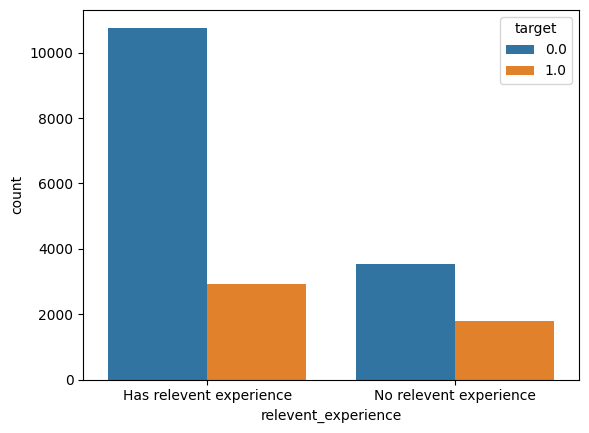

In [51]:
sns.countplot(x=data['relevent_experience'],hue=data['target'])

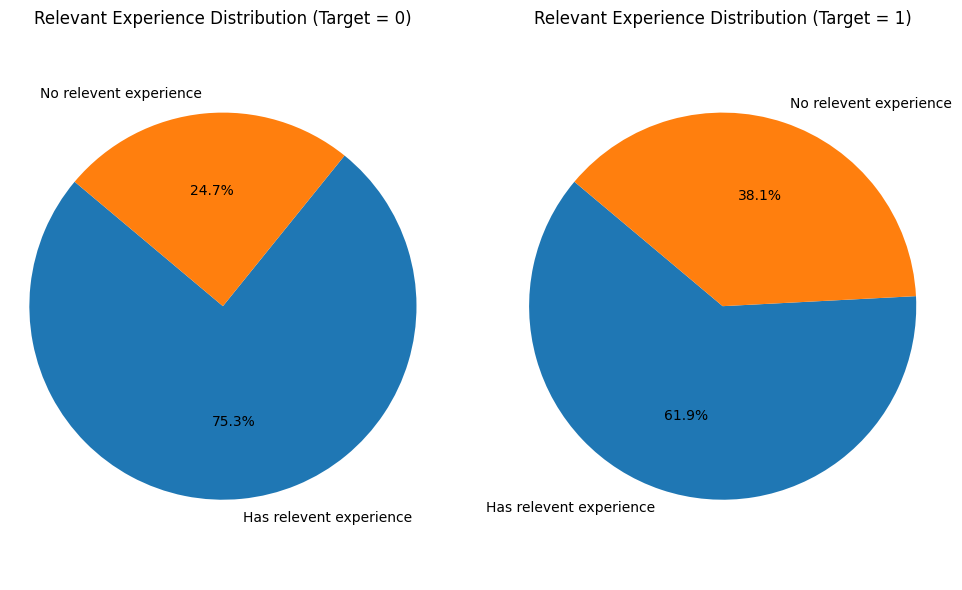

In [52]:
import matplotlib.pyplot as plt

# Filter the DataFrame for each target value
df_target_0 = data[data['target'] == 0]
df_target_1 = data[data['target'] == 1]

# Calculate counts for the 'relevant_experience' column in each subset
experience_counts_0 = df_target_0['relevent_experience'].value_counts()
experience_counts_1 = df_target_1['relevent_experience'].value_counts()

# Create pie chart for target 0
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.pie(experience_counts_0, labels=experience_counts_0.index, autopct='%1.1f%%', startangle=140)
plt.title('Relevant Experience Distribution (Target = 0)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Create pie chart for target 1
plt.subplot(1, 2, 2)
plt.pie(experience_counts_1, labels=experience_counts_1.index, autopct='%1.1f%%', startangle=140)
plt.title('Relevant Experience Distribution (Target = 1)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Show both pie charts
plt.tight_layout()
plt.show()


<Axes: xlabel='enrolled_university', ylabel='count'>

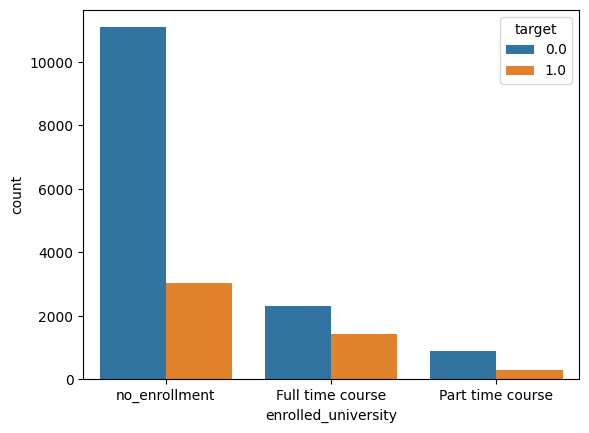

In [53]:
sns.countplot(x=data['enrolled_university'],hue=data['target'])

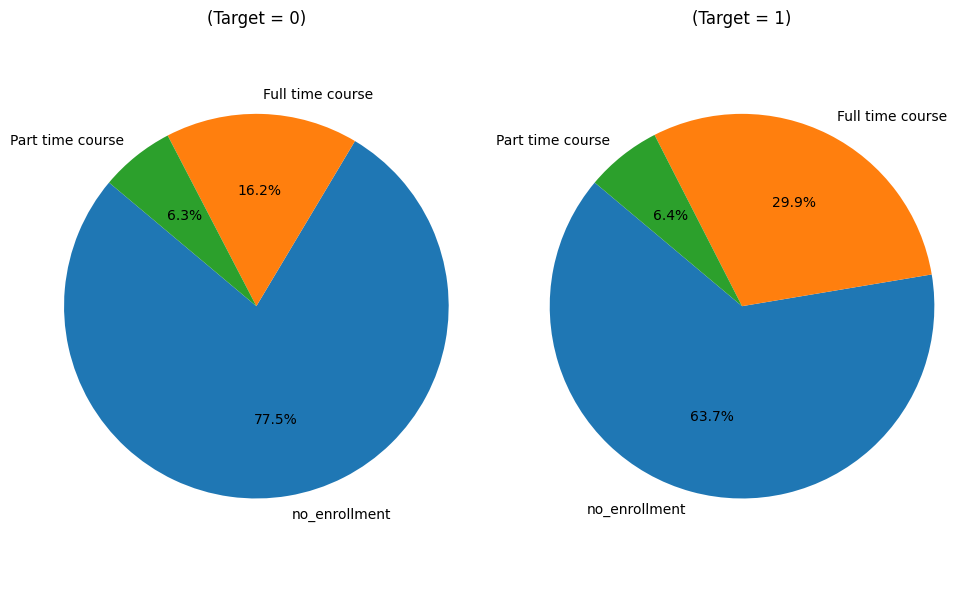

In [54]:
import matplotlib.pyplot as plt

# Filter the DataFrame for each target value
df_target_0 = data[data['target'] == 0]
df_target_1 = data[data['target'] == 1]

# Calculate counts for the 'relevant_experience' column in each subset
experience_counts_0 = df_target_0['enrolled_university'].value_counts()
experience_counts_1 = df_target_1['enrolled_university'].value_counts()

# Create pie chart for target 0
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.pie(experience_counts_0, labels=experience_counts_0.index, autopct='%1.1f%%', startangle=140)
plt.title('(Target = 0)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Create pie chart for target 1
plt.subplot(1, 2, 2)
plt.pie(experience_counts_1, labels=experience_counts_1.index, autopct='%1.1f%%', startangle=140)
plt.title('(Target = 1)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Show both pie charts
plt.tight_layout()
plt.show()


<Axes: xlabel='education_level', ylabel='count'>

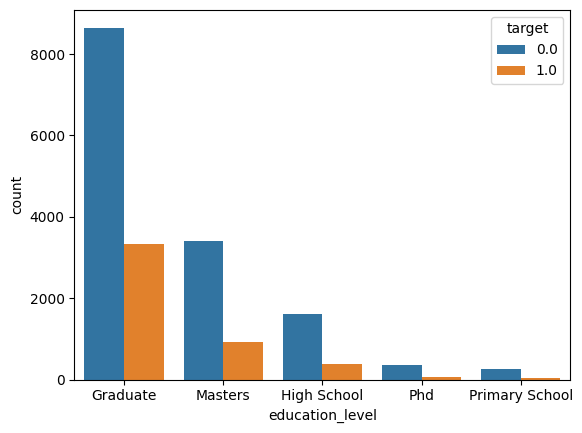

In [55]:
sns.countplot(x=data['education_level'],hue=data['target'])

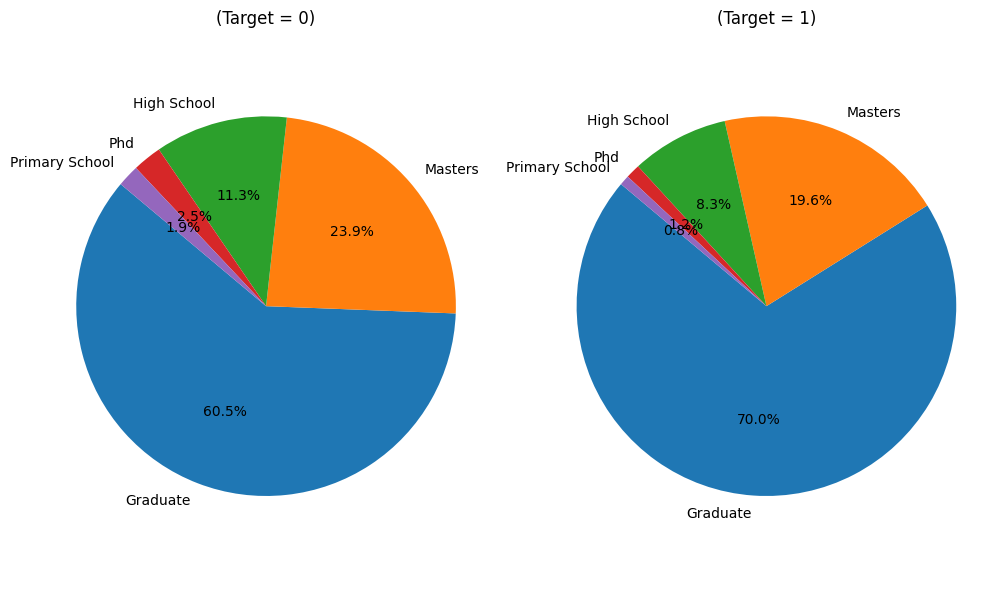

In [56]:
import matplotlib.pyplot as plt

# Filter the DataFrame for each target value
df_target_0 = data[data['target'] == 0]
df_target_1 = data[data['target'] == 1]

# Calculate counts for the 'relevant_experience' column in each subset
experience_counts_0 = df_target_0['education_level'].value_counts()
experience_counts_1 = df_target_1['education_level'].value_counts()

# Create pie chart for target 0
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.pie(experience_counts_0, labels=experience_counts_0.index, autopct='%1.1f%%', startangle=140)
plt.title('(Target = 0)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Create pie chart for target 1
plt.subplot(1, 2, 2)
plt.pie(experience_counts_1, labels=experience_counts_1.index, autopct='%1.1f%%', startangle=140)
plt.title('(Target = 1)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Show both pie charts
plt.tight_layout()
plt.show()


<Axes: xlabel='major_discipline', ylabel='count'>

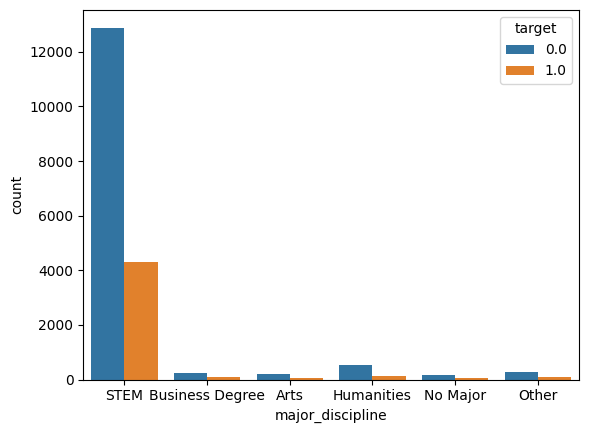

In [57]:
sns.countplot(x=data['major_discipline'],hue=data['target'])

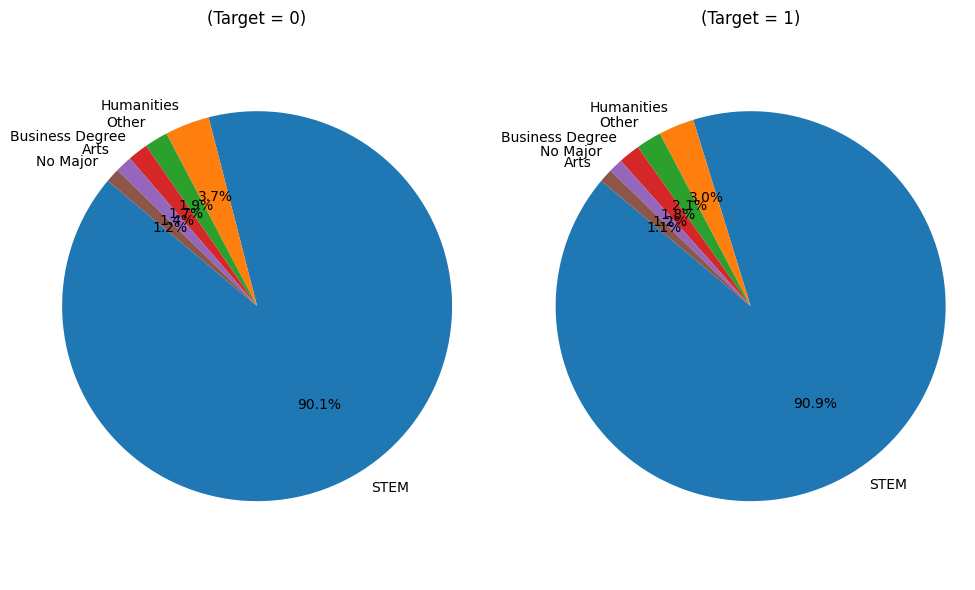

In [58]:
import matplotlib.pyplot as plt

# Filter the DataFrame for each target value
df_target_0 = data[data['target'] == 0]
df_target_1 = data[data['target'] == 1]

# Calculate counts for the 'relevant_experience' column in each subset
experience_counts_0 = df_target_0['major_discipline'].value_counts()
experience_counts_1 = df_target_1['major_discipline'].value_counts()

# Create pie chart for target 0
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.pie(experience_counts_0, labels=experience_counts_0.index, autopct='%1.1f%%', startangle=140)
plt.title('(Target = 0)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Create pie chart for target 1
plt.subplot(1, 2, 2)
plt.pie(experience_counts_1, labels=experience_counts_1.index, autopct='%1.1f%%', startangle=140)
plt.title('(Target = 1)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Show both pie charts
plt.tight_layout()
plt.show()


In [59]:
data['company_size'].unique()

array(['unidentified', '50-99', '<10', '10000+', '5000-9999', '1000-4999',
       '10/49', '100-500', '500-999'], dtype=object)

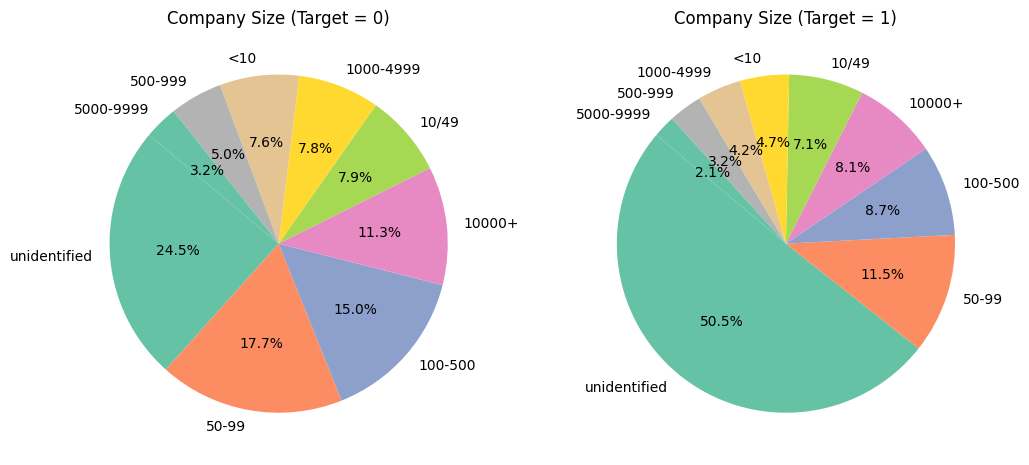

In [60]:
df_target_0 = data[data['target'] == 0]
df_target_1 = data[data['target'] == 1]

company_size_0 = df_target_0['company_size'].value_counts(normalize=True)
company_size_1 = df_target_1['company_size'].value_counts(normalize=True)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for target = 0
axes[0].pie(company_size_0, labels=company_size_0.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
axes[0].set_title('Company Size (Target = 0)')

# Pie chart for target = 1
axes[1].pie(company_size_1, labels=company_size_1.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
axes[1].set_title('Company Size (Target = 1)')

plt.show()


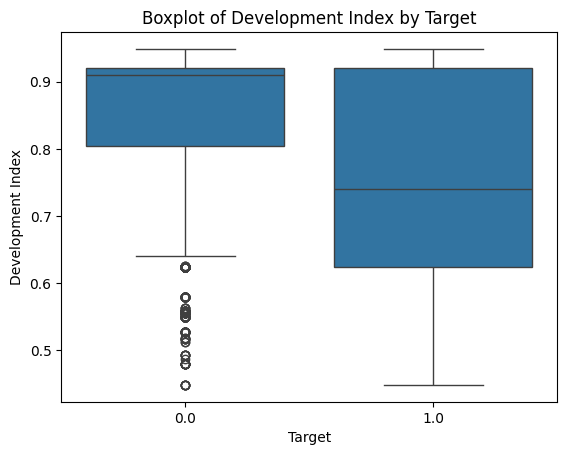

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.boxplot(x='target', y='city_development_index', data=data)

plt.title('Boxplot of Development Index by Target')
plt.xlabel('Target')
plt.ylabel('Development Index')
plt.show()


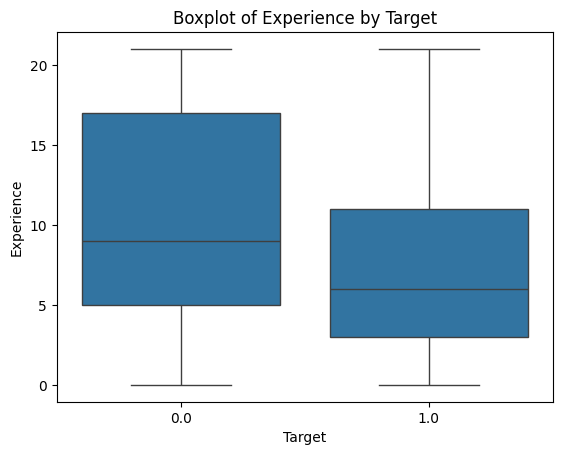

In [86]:
sns.boxplot(x='target', y='experience', data=data)

plt.title('Boxplot of Experience by Target')
plt.xlabel('Target')
plt.ylabel('Experience')
plt.show()


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19041 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19041 non-null  float64
 1   gender                  19041 non-null  object 
 2   relevent_experience     19041 non-null  object 
 3   enrolled_university     19041 non-null  object 
 4   education_level         19041 non-null  object 
 5   major_discipline        19041 non-null  object 
 6   experience              19041 non-null  int32  
 7   company_size            19041 non-null  object 
 8   company_type            19041 non-null  object 
 9   last_new_job            19041 non-null  object 
 10  training_hours          19041 non-null  int64  
 11  target                  19041 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(8)
memory usage: 1.8+ MB


In [62]:
data['last_new_job'].value_counts()

last_new_job
1        8404
>4       3261
2        2890
never    2437
4        1028
3        1021
Name: count, dtype: int64

In [63]:
data.loc[data['last_new_job'] == '>4', 'last_new_job'] = '5'
data.loc[data['last_new_job'] == 'never', 'last_new_job'] = '0'
data['last_new_job'] = data['last_new_job'].astype(int)
data['last_new_job'].unique()

array([1, 5, 0, 4, 3, 2])

In [64]:
data.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,unidentified,unidentified,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0.0
2,0.624,unidentified,No relevent experience,Full time course,Graduate,STEM,5,unidentified,unidentified,0,83,0.0
3,0.789,unidentified,No relevent experience,no_enrollment,Graduate,Business Degree,0,unidentified,Pvt Ltd,0,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0.0


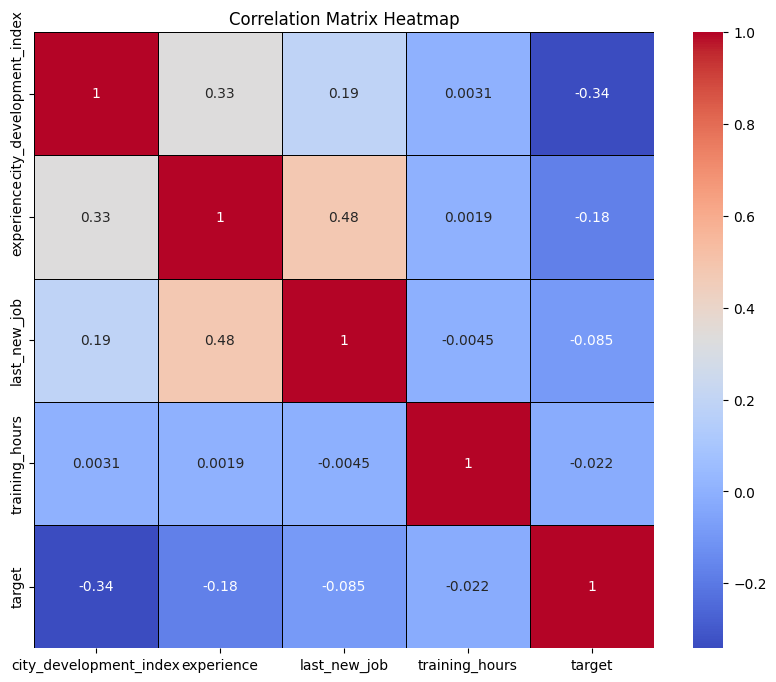

In [65]:
# Calculate correlation matrix
num_data=data.select_dtypes(['float64','int64','int32'])
correlation_matrix = num_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19041 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19041 non-null  float64
 1   gender                  19041 non-null  object 
 2   relevent_experience     19041 non-null  object 
 3   enrolled_university     19041 non-null  object 
 4   education_level         19041 non-null  object 
 5   major_discipline        19041 non-null  object 
 6   experience              19041 non-null  int32  
 7   company_size            19041 non-null  object 
 8   company_type            19041 non-null  object 
 9   last_new_job            19041 non-null  int32  
 10  training_hours          19041 non-null  int64  
 11  target                  19041 non-null  float64
dtypes: float64(2), int32(2), int64(1), object(7)
memory usage: 1.7+ MB


In [67]:
obj_cols=data.select_dtypes(include='object').columns.to_list()
for i in obj_cols:
    print(data[i].value_counts())
    print()

gender
Male            13159
unidentified     4458
Female           1236
Other             188
Name: count, dtype: int64

relevent_experience
Has relevent experience    13704
No relevent experience      5337
Name: count, dtype: int64

enrolled_university
no_enrollment       14111
Full time course     3733
Part time course     1197
Name: count, dtype: int64

education_level
Graduate          11971
Masters            4343
High School        2009
Phd                 411
Primary School      307
Name: count, dtype: int64

major_discipline
STEM               17195
Humanities           668
Other                377
Business Degree      326
Arts                 252
No Major             223
Name: count, dtype: int64

company_size
unidentified    5894
50-99           3075
100-500         2553
10000+          2001
10/49           1465
1000-4999       1317
<10             1304
500-999          874
5000-9999        558
Name: count, dtype: int64

company_type
Pvt Ltd                9767
unidentified 

In [68]:
df_encoded=pd.get_dummies(data,columns=obj_cols,drop_first=True,dtype='int')

In [69]:
df_encoded.head()

,city_development_index,experience,last_new_job,training_hours,target,gender_Male,gender_Other,gender_unidentified,relevent_experience_No relevent experience,enrolled_university_Part time course,...,company_size_500-999,company_size_5000-9999,company_size_<10,company_size_unidentified,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_unidentified
0,0.920,21,1,36,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.776,15,5,47,0.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.624,5,0,83,0.0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0.789,0,0,52,1.0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0.767,21,4,8,0.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [70]:
df_encoded['target'].value_counts(normalize=True)*100

target
0.0    75.095846
1.0    24.904154
Name: proportion, dtype: float64

## Feature Selection and Scaling

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X=df_encoded.drop('target',axis=1)
y=df_encoded[['target']]

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y.values.ravel(),test_size=0.2,random_state=42,stratify=y)

In [74]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE

best_features = RFE(estimator=ExtraTreesClassifier(n_estimators=100), n_features_to_select=12)
best_features.fit(X_train, y_train)
selected_features = X.columns[best_features.support_]

X_train_selected = best_features.transform(X_train)
X_test_selected = best_features.transform(X_test)

print(f"Number of selected features: {len(selected_features)}")
print(f"Selected features : {list(selected_features)}")

Number of selected features: 12
Selected features : ['city_development_index', 'experience', 'last_new_job', 'training_hours', 'gender_Male', 'relevent_experience_No relevent experience', 'enrolled_university_no_enrollment', 'education_level_High School', 'education_level_Masters', 'company_size_unidentified', 'company_type_Pvt Ltd', 'company_type_unidentified']


In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_selected = scaler.fit_transform(X_train_selected)
X_test_selected = scaler.transform(X_test_selected)


## LogisticRegression

Cross-Validation Results:
Accuracy: 0.766 (+/- 0.005)
Precision: 0.568 (+/- 0.020)
Recall   : 0.247 (+/- 0.017)
F1 Score : 0.344 (+/- 0.020)
Test Data Metrics:
Accuracy : 0.773
Precision: 0.599
Recall   : 0.268
F1 Score : 0.370


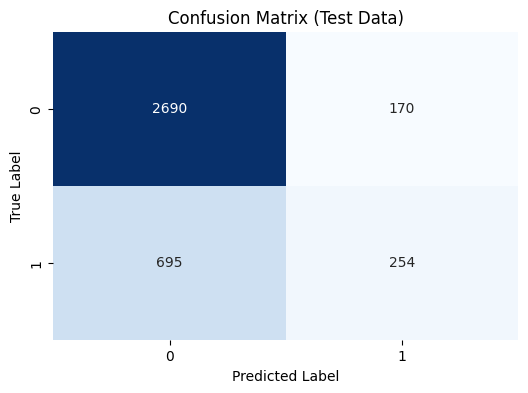

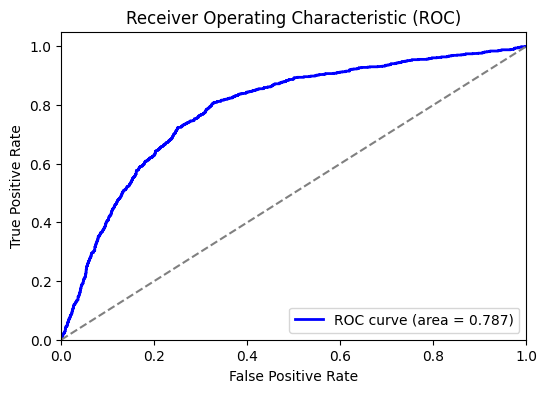

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    roc_curve, 
    auc, 
    make_scorer
)


clf = LogisticRegression(max_iter=5000, random_state=42)


scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}

cv_results = cross_validate(clf, X_train_selected, y_train, cv=5, scoring=scoring)
#cross-validation results
print("Cross-Validation Results:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.3f} (+/- {np.std(cv_results['test_accuracy']):.3f})")
print(f"Precision: {np.mean(cv_results['test_precision']):.3f} (+/- {np.std(cv_results['test_precision']):.3f})")
print(f"Recall   : {np.mean(cv_results['test_recall']):.3f} (+/- {np.std(cv_results['test_recall']):.3f})")
print(f"F1 Score : {np.mean(cv_results['test_f1']):.3f} (+/- {np.std(cv_results['test_f1']):.3f})")


clf.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_selected)
y_pred_proba = clf.predict_proba(X_test_selected)[:, 1]  # Probabilities for the positive class

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='binary')
test_recall = recall_score(y_test, y_pred, average='binary')
test_f1 = f1_score(y_test, y_pred, average='binary')

print("Test Data Metrics:")
print(f"Accuracy : {test_accuracy:.3f}")
print(f"Precision: {test_precision:.3f}")
print(f"Recall   : {test_recall:.3f}")
print(f"F1 Score : {test_f1:.3f}")

# plot the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Data)')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


## GradientBoosting

Cross-Validation Results:
Accuracy: 0.790 (+/- 0.005)
Precision: 0.589 (+/- 0.014)
Recall   : 0.519 (+/- 0.022)
F1 Score : 0.551 (+/- 0.012)
Test Data Metrics:
Accuracy : 0.792
Precision: 0.588
Recall   : 0.558
F1 Score : 0.573


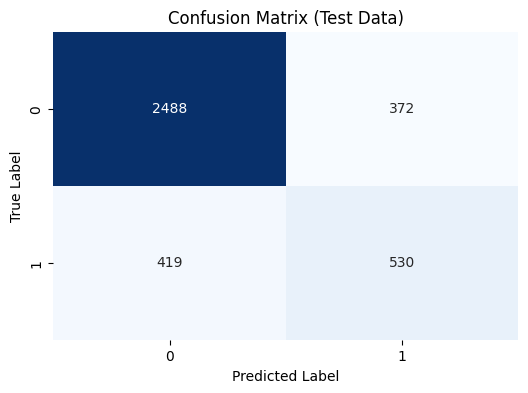

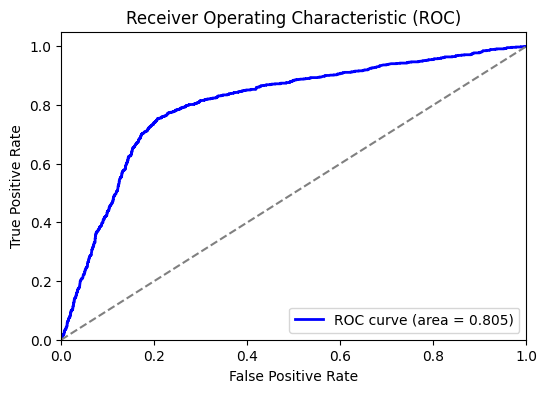

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
gbc = GradientBoostingClassifier(random_state=42)

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}

# Perform cross-validation
cv_results = cross_validate(gbc, X_train_selected, y_train, cv=5, scoring=scoring)

print("Cross-Validation Results:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.3f} (+/- {np.std(cv_results['test_accuracy']):.3f})")
print(f"Precision: {np.mean(cv_results['test_precision']):.3f} (+/- {np.std(cv_results['test_precision']):.3f})")
print(f"Recall   : {np.mean(cv_results['test_recall']):.3f} (+/- {np.std(cv_results['test_recall']):.3f})")
print(f"F1 Score : {np.mean(cv_results['test_f1']):.3f} (+/- {np.std(cv_results['test_f1']):.3f})")

gbc.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = gbc.predict(X_test_selected)
y_pred_proba = gbc.predict_proba(X_test_selected)[:, 1]  # Probabilities for the positive class

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='binary')
test_recall = recall_score(y_test, y_pred, average='binary')
test_f1 = f1_score(y_test, y_pred, average='binary')

print("Test Data Metrics:")
print(f"Accuracy : {test_accuracy:.3f}")
print(f"Precision: {test_precision:.3f}")
print(f"Recall   : {test_recall:.3f}")
print(f"F1 Score : {test_f1:.3f}")

# plot the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Data)')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


## RandomForest

Cross-Validation Results:
Accuracy: 0.777 (+/- 0.005)
Precision: 0.566 (+/- 0.012)
Recall   : 0.442 (+/- 0.024)
F1 Score : 0.496 (+/- 0.016)
Test Data Metrics:
Accuracy : 0.769
Precision: 0.546
Recall   : 0.424
F1 Score : 0.477


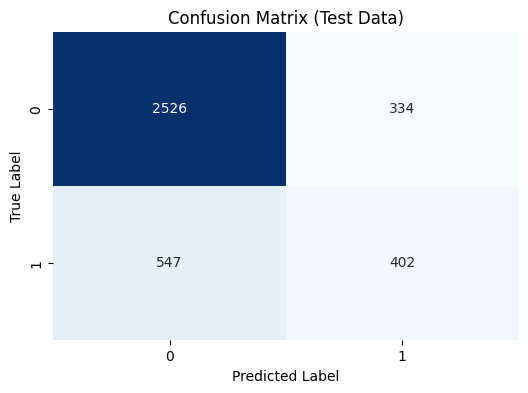

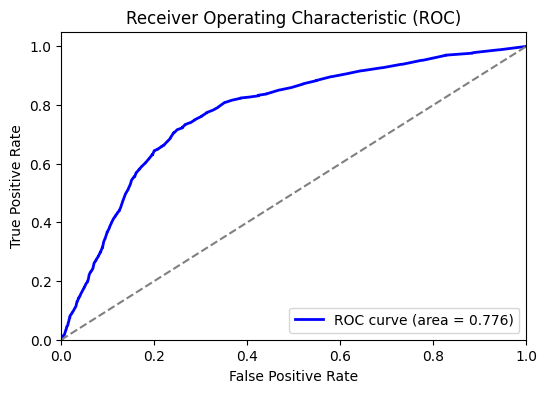

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}

# Perform cross-validation
cv_results = cross_validate(rf_clf, X_train_selected, y_train, cv=5, scoring=scoring, return_train_score=False)


print("Cross-Validation Results:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.3f} (+/- {np.std(cv_results['test_accuracy']):.3f})")
print(f"Precision: {np.mean(cv_results['test_precision']):.3f} (+/- {np.std(cv_results['test_precision']):.3f})")
print(f"Recall   : {np.mean(cv_results['test_recall']):.3f} (+/- {np.std(cv_results['test_recall']):.3f})")
print(f"F1 Score : {np.mean(cv_results['test_f1']):.3f} (+/- {np.std(cv_results['test_f1']):.3f})")


rf_clf.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test_selected)
y_pred_proba = rf_clf.predict_proba(X_test_selected)[:, 1]  # Probabilities for the positive class

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='binary')
test_recall = recall_score(y_test, y_pred, average='binary')
test_f1 = f1_score(y_test, y_pred, average='binary')

print("Test Data Metrics:")
print(f"Accuracy : {test_accuracy:.3f}")
print(f"Precision: {test_precision:.3f}")
print(f"Recall   : {test_recall:.3f}")
print(f"F1 Score : {test_f1:.3f}")

# plot the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Data)')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


## KNN

Cross-Validation Results:
Accuracy: 0.762 (+/- 0.004)
Precision: 0.540 (+/- 0.014)
Recall   : 0.294 (+/- 0.030)
F1 Score : 0.381 (+/- 0.028)
Test Data Metrics:
Accuracy : 0.753
Precision: 0.508
Recall   : 0.274
F1 Score : 0.356


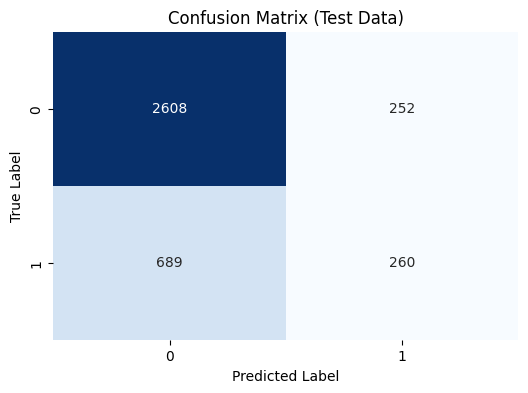

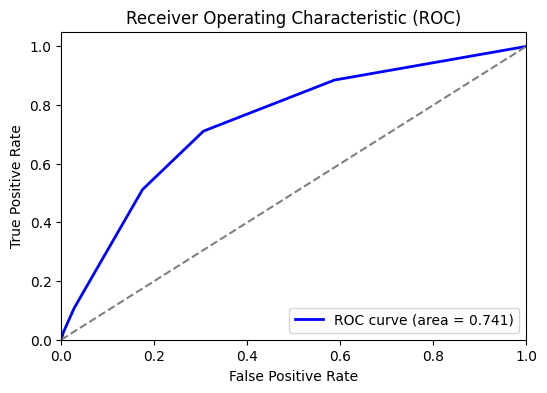

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}

# Perform cross-validation
cv_results = cross_validate(knn, X_train_selected, y_train, cv=5, scoring=scoring, return_train_score=False)

print("Cross-Validation Results:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.3f} (+/- {np.std(cv_results['test_accuracy']):.3f})")
print(f"Precision: {np.mean(cv_results['test_precision']):.3f} (+/- {np.std(cv_results['test_precision']):.3f})")
print(f"Recall   : {np.mean(cv_results['test_recall']):.3f} (+/- {np.std(cv_results['test_recall']):.3f})")
print(f"F1 Score : {np.mean(cv_results['test_f1']):.3f} (+/- {np.std(cv_results['test_f1']):.3f})")


knn.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_selected)
y_pred_proba = knn.predict_proba(X_test_selected)[:, 1]  # Probabilities for the positive class

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='binary')
test_recall = recall_score(y_test, y_pred, average='binary')
test_f1 = f1_score(y_test, y_pred, average='binary')

print("Test Data Metrics:")
print(f"Accuracy : {test_accuracy:.3f}")
print(f"Precision: {test_precision:.3f}")
print(f"Recall   : {test_recall:.3f}")
print(f"F1 Score : {test_f1:.3f}")

# plot the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Data)')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
